<a href="https://colab.research.google.com/github/allaltune/HCSPD_2024/blob/main/Semana%201/Actividad%20semana%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad 1 - a.




Se asignan los valores:
  R = 1Ω,
  L = 1H y
  C = 1F

Queda el espacio de estados:

$$ A= \begin{bmatrix}
-1 & -1 \\
1 & 0 \\
\end{bmatrix}  $$

$$ B= \begin{bmatrix}
1  \\
 0 \\
\end{bmatrix}  $$

$$ C^T= \begin{bmatrix}
1 & 0 \\
\end{bmatrix}  $$

Se instala Octave

In [ ]:
!apt install octave

In [ ]:
!apt-get install -y liboctave-dev

In [4]:
%%writefile instalacion_pkg.m
pkg install -forge control


Writing instalacion_pkg.m


In [5]:
%%writefile inst_pkg_signal.m
pkg install -forge signal

Writing inst_pkg_signal.m


In [ ]:
!octave -W instalacion_pkg.m

In [7]:
!octave -W inst_pkg_signal.m

For information about changes from previous versions of the signal package, run 'news signal'.


Se resuelve en forma analítica mediante Octave:

In [39]:
%%writefile Calculo_RLC_Analitico.m
clear all; clc;
pkg load control
pkg load signal
warning('off','all');


#Defino el espacio de estados
A= [-1, -1; 1, 0];
B= [1; 0];
C= [1;0];
C2= [0;1];
C_transp= C';
C2_transp=C2';
#Planteo el sistema
sys=ss(A,B,C_transp);
[num,den]=ss2tf(sys);

sys2=ss(A,B,C2_transp);
[num2,den2]=ss2tf(sys2);

G=tf(num,den);
G2=tf(num2,den2);

t=0:0.1:3;
u = zeros (length(t) ,1);
i=1;
for t=0:0.1:3
  i=i+1;
  u(i,1)=12;
  endfor
#Grafico y guardo el png
hfig1 = figure(1); set(hfig1, 'Visible', 'off');

subplot(2,1,1); hold on;
lsim(sys,u,t);title('x_1 corriente'); hold on;

subplot(2,1,2); hold on;
lsim(sys2,u,t);title('x_2 Vc_t'); hold on;

print(hfig1,'Vars_temporal','-r300','-dpng');
save('Calculo_RLC_Analitico.mat','-v7');


Overwriting Calculo_RLC_Analitico.m


In [36]:
!octave -W Calculo_RLC_Analitico.m

ans = -8.2778
ans = -23.804


In [40]:
!octave -W Calculo_RLC_Analitico.m
import scipy.io
mat = scipy.io.loadmat('/content/Calculo_RLC_Analitico.mat')

ans = -8.2778
ans = -23.804


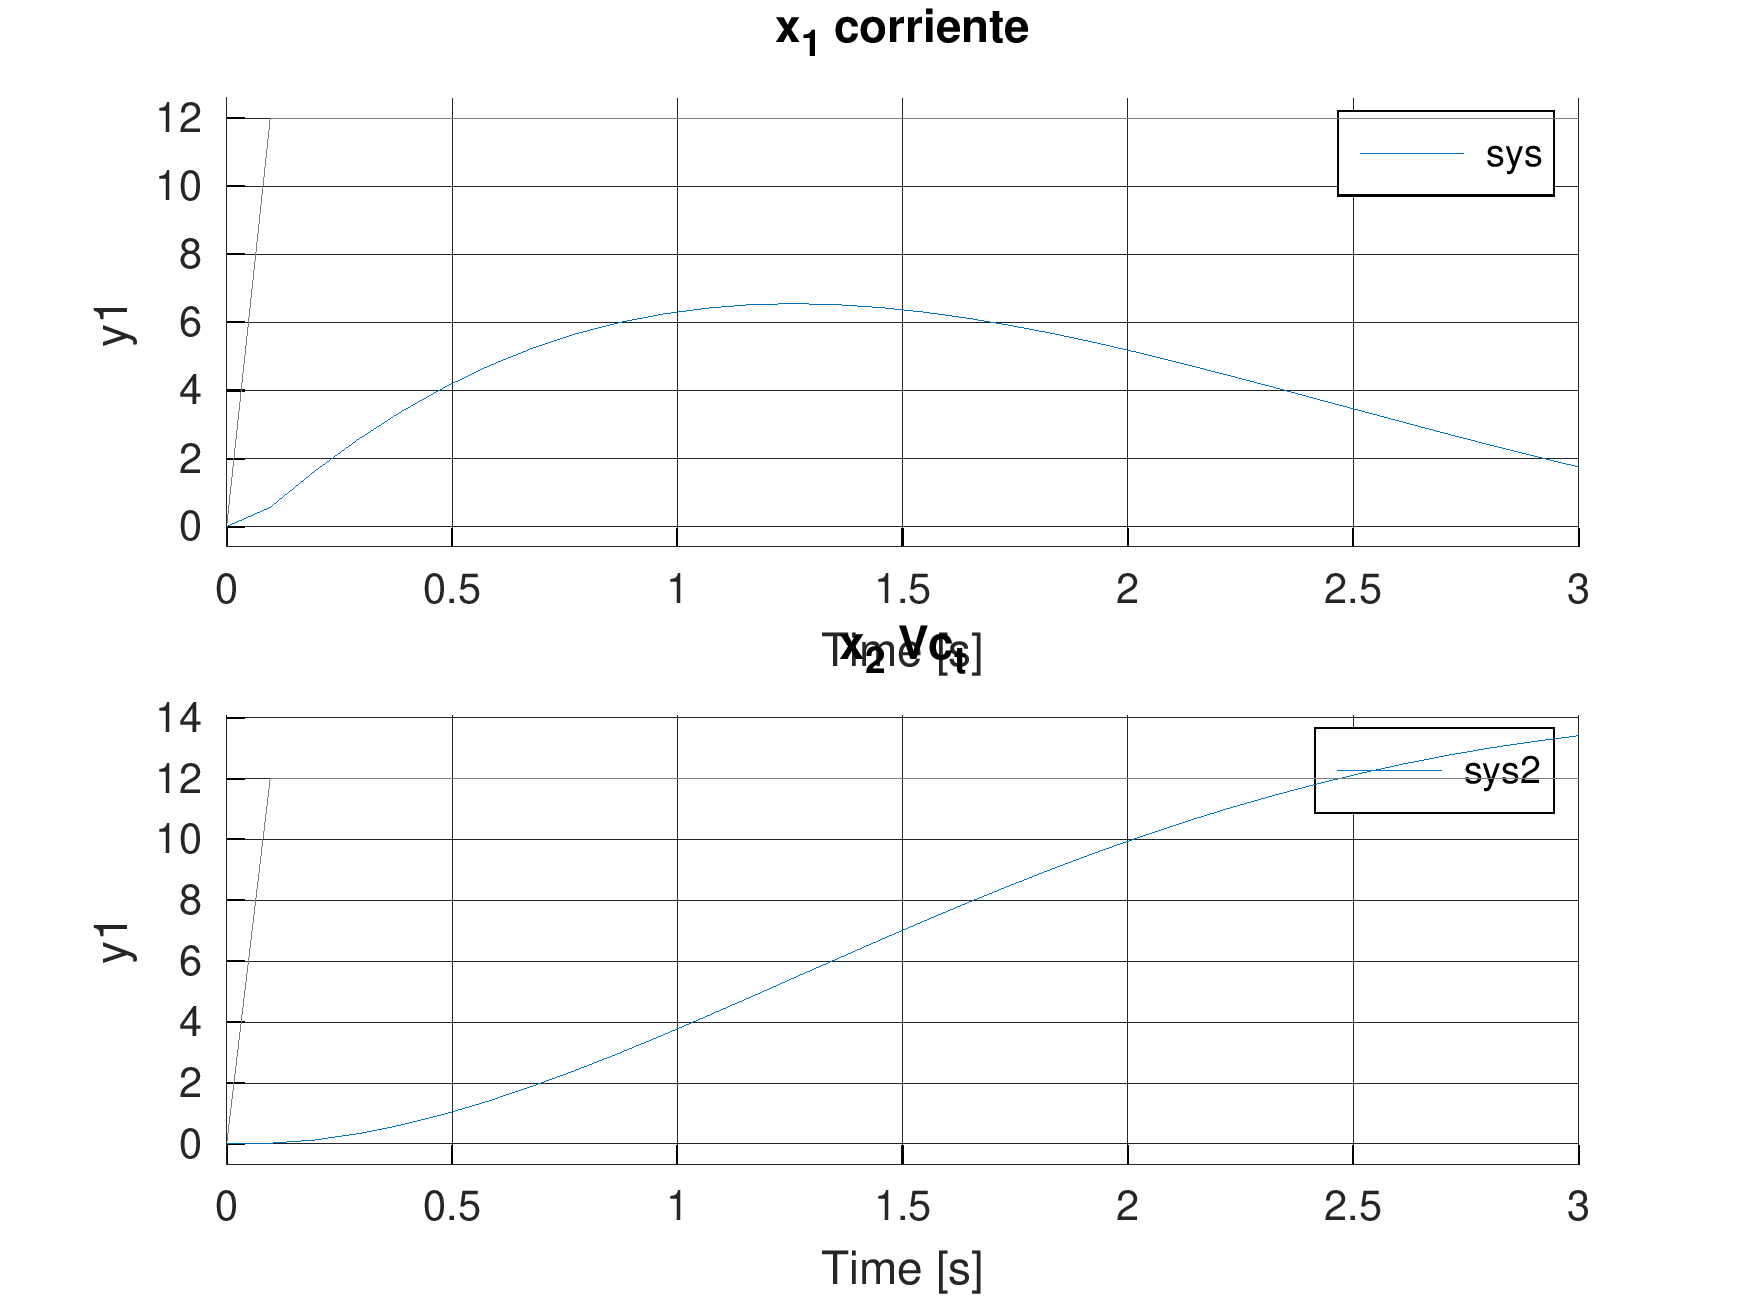

In [41]:
from PIL import Image
imt = Image.open("/content/Vars_temporal.png")
imt

#Actividad 1 - b.

Planteando la solución mediante Euler:

In [53]:
%%writefile Verificacion_Num.m
clc;clear all;
warning('off','all');

#Defino el espacio de estados
R=1;L=1;C=1;
A=[-R/L, -1/L; 1/C,0];
B=[1/L;0];
C=[R 0];
u=12;

 eig(A)
 1./ans
#condicion inicial
X=-[0; 0];
ii=0;

#tiempo de etapa
t_etapa=1e-3;
wRef=2;
h=1e-9;
#Tiempo de fin de simulación
tF=3;

color_='r';
color='b';

u=0;TL=1.15e-4;u=12;

for t=0:t_etapa:tF
  ii=ii+1;
  k=ii+2;
  x1(ii)=X(1);%corriente
  x2(ii)=X(2);%tensión en el capacitor
  x=X;
    for ii=1:t_etapa/h
    xp=A*x+B*u;
    x=x+xp*h;
    end
  X=[x];%x1 corriente, x2 tensión
  acc(ii)=u;
end

t=0:t_etapa:tF;
hfig1 = figure(1); set(hfig1, 'Visible', 'off');

subplot(3,1,1);hold on;
plot(t,x1,color_);title('x_1 corriente'); hold on;

subplot(3,1,2);hold on;
plot(t,x2,color_);title('x_2 Vc_t');
subplot(3,1,3);hold on;
plot(t,acc,color_);title('Entrada u_t, v_a');
xlabel('Tiempo [Seg.]');

print(hfig1,'Vars_temporal','-r300','-dpng');
save('Verificacion_Num_1.mat','-v7');

Overwriting Verificacion_Num.m


In [ ]:
# -W : no window system
!octave -W Verificacion_Num.m
import scipy.io
mat = scipy.io.loadmat('/content/Verificacion_Num_1.mat')

ans =

  -0.5000 + 0.8660i
  -0.5000 - 0.8660i

ans =

  -0.5000 - 0.8660i
  -0.5000 + 0.8660i



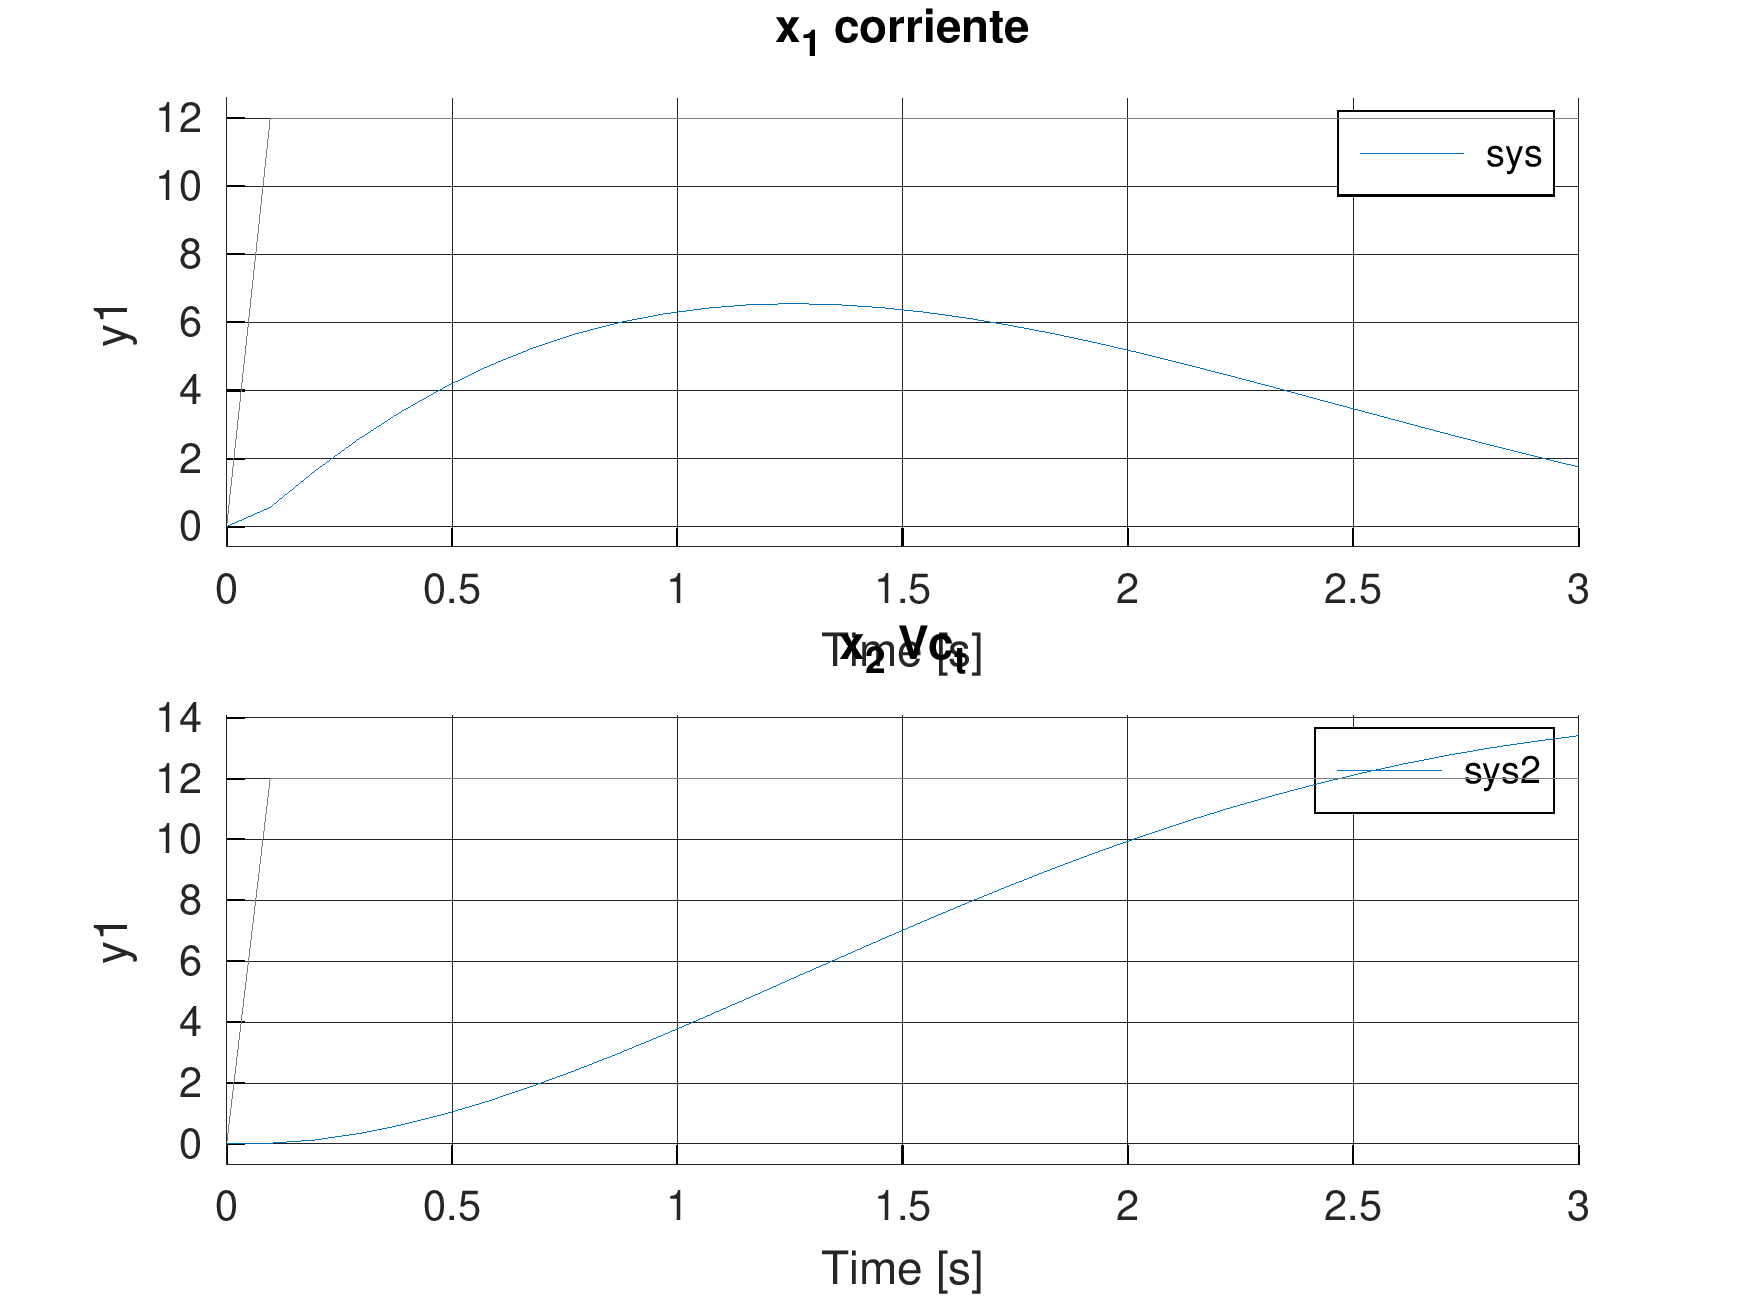

In [48]:
from PIL import Image
imt = Image.open("/content/Vars_temporal.png")
imt